<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загружаем-датасет" data-toc-modified-id="Загружаем-датасет-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем датасет</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Мешок-слов" data-toc-modified-id="Мешок-слов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Мешок слов</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost-Classifier" data-toc-modified-id="CatBoost-Classifier-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>CatBoost Classifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost-Classifier" data-toc-modified-id="CatBoost-Classifier-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>CatBoost Classifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>BERT</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost-Classifier" data-toc-modified-id="CatBoost-Classifier-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>CatBoost Classifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Анализ токсичных комментариев c BERT

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Нужно обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

## Подготовка

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import os
import re
import torch
import transformers
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import notebook
from tqdm.notebook import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import warnings

warnings.filterwarnings("ignore")
state = np.random.RandomState(12345)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Загружаем датасет

In [2]:
path1 = 'toxic_comments.csv'
path2 = '/datasets/toxic_comments.csv'

def read_file(path1, path2):
    if os.path.exists(path1):
        df = pd.read_csv(path1, parse_dates = [0])
    elif os.path.exists(path2):
        df = pd.read_csv(path2, parse_dates = [0])
    else:
        print('File not found')
    return df

df = read_file(path1, path2)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  object
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Удалим столбец, повторяющий индексы.

In [4]:
df = df.drop('Unnamed: 0', axis=1)

### Баланс классов

0    143106
1     16186
Name: toxic, dtype: int64


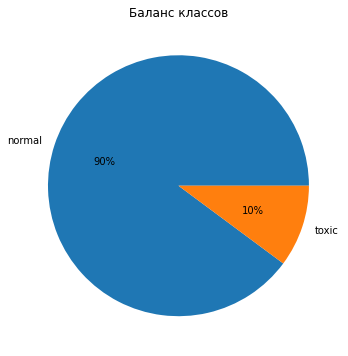

In [5]:
print(df['toxic'].value_counts())
plt.figure(figsize=(10,6))
plt.pie(df['toxic'].value_counts(), labels=['normal', 'toxic'], autopct='%.0f%%')
plt.title('Баланс классов')
plt.show()

Видим большой дисбаланс классов. Однако, нам это не помешает, т.к. в логистической регрессии можно указать соответствующий параметр class_weight, а на разделение в деревянных моделях это почти не повлияет.

### Очистка текста

При помощи регулярных выражений, напишем функцию, которая оставит в тексте только латинские символы и пробелы.

In [6]:
def clear_text(text):
    clear = re.sub(r'[^a-zA-Z ] ', ' ', text.lower())
    clear = clear.split()
    clear = ' '.join(clear)
    return clear

df['text'] = df['text'].apply(clear_text)

### Лемматизация

Выполним лемматизацию английского текста при помощи WordNetLemmatizer.

In [7]:
 def get_wordnet_pos(word):
     tag = nltk.pos_tag([word])[0][1][0].upper()
     tag_dict = {"J": wordnet.ADJ,
                 "N": wordnet.NOUN,
                 "V": wordnet.VERB,
                 "R": wordnet.ADV}
     return tag_dict.get(tag, wordnet.NOUN)

In [8]:
tqdm.pandas()

stopwords = set(nltk_stopwords.words('english'))

def lemmatize(text):  
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemm_text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list if w not in stopwords])
    return lemm_text

df['lemm_text'] = df['text'].progress_apply(lemmatize)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [9]:
df.head()

,text,toxic,lemm_text
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...
1,d'aww he matches this background colour i'm se...,0,d'aww match background colour 'm seemingly stu...
2,hey man i'm really not trying to edit war it's...,0,hey man 'm really try edit war 's guy constant...
3,""" more i can't make any real suggestions on im...",0,`` ca n't make real suggestion improvement won...
4,you sir are my hero any chance you remember wh...,0,sir hero chance remember page 's ?


### Промежуточный вывод

- данные загружены и изучены
- проанализирован дисбаланс классов
- выполнены очистка и лемматизация текста.

## Обучение

Разделим данные на тренировочную и тестовую выборки

In [10]:
features = df['lemm_text']
target = df['toxic']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, \
                                                                           random_state = state)

In [11]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(143362,)
(143362,)
(15930,)
(15930,)


### TF-IDF

In [17]:
stopwords = set(nltk_stopwords.words('english'))

In [18]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf.fit_transform(features_train)
tf_idf_test = count_tf_idf.transform(features_test)

In [19]:
print(tf_idf_train.shape)

#### Дерево решений

In [20]:
pipe_tree_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('tree', DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10,\
                                    min_samples_split = 2, random_state = state))
])

In [21]:
%%time

tree_tfidf_res = cross_val_score(pipe_tree_tfidf, features_train, target_train,\
                                 scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 решающего дерева', tree_tfidf_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.554) total time=   7.7s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] END ................................ score: (test=0.546) total time=   8.1s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV] END ................................ score: (test=0.564) total time=   8.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.8s remaining:    0.0s


[CV] END ................................ score: (test=0.556) total time=   7.8s
[CV] END ................................ score: (test=0.543) total time=   7.7s
F1 решающего дерева 0.5524398977420499
CPU times: user 38.7 s, sys: 534 ms, total: 39.3 s
Wall time: 39.3 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.3s finished


#### CatBoost Classifier

In [22]:
pipe_cb_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('cb', CatBoostClassifier(n_estimators = 50, depth = 6, learning_rate = 0.01, logging_level='Silent',\
                              custom_metric = 'F1'))
])

In [23]:
%%time

cb_tfidf_res = cross_val_score(pipe_cb_tfidf, features_train, target_train,\
                               scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 CatBoost Classifier:', cb_tfidf_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.474) total time= 2.6min


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s


[CV] END ................................ score: (test=0.475) total time= 2.6min


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  5.2min remaining:    0.0s


[CV] END ................................ score: (test=0.484) total time= 2.6min


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.8min remaining:    0.0s


[CV] END ................................ score: (test=0.473) total time= 2.6min
[CV] END ................................ score: (test=0.469) total time= 2.6min
F1 CatBoost Classifier: 0.47508125210144314
CPU times: user 12min 45s, sys: 9.46 s, total: 12min 55s
Wall time: 12min 59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.0min finished


#### Логистическая регрессия

In [24]:
pipe_lr_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('cb', LogisticRegression(solver = 'lbfgs', C = 10, class_weight = 'balanced',\
                              max_iter = 100, random_state = state))
])

In [25]:
%%time

lr_tfidf_res = cross_val_score(pipe_lr_tfidf, features_train, target_train,\
                               scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 Логистической регрессии:', lr_tfidf_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.763) total time=  55.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   55.6s remaining:    0.0s


[CV] END ................................ score: (test=0.753) total time=  55.6s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] END ................................ score: (test=0.749) total time=  53.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.8min remaining:    0.0s


[CV] END ................................ score: (test=0.758) total time=  56.0s
[CV] END ................................ score: (test=0.760) total time=  54.1s
F1 Логистической регрессии: 0.7566750724278505
CPU times: user 1min 41s, sys: 2min 53s, total: 4min 34s
Wall time: 4min 35s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


#### Промежуточный вывод

После кросс-валидации, необходимый порог целевой метрики показала логистическая регрессия.

### BERT

Возьмем модель для английского языка toxic-bert.

In [26]:
# ограничим выборку 700 сэмплов
df_bert = read_file(path1, path2)
df_bert = df.sample(700).reset_index(drop=True)

In [27]:
tokenizer = transformers.BertTokenizer.from_pretrained('unitary/toxic-bert')
config = transformers.BertConfig.from_pretrained('unitary/toxic-bert')
model = transformers.BertModel.from_pretrained('unitary/toxic-bert', config=config)

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
tokenized = df_bert['text'].apply(
    lambda x: tokenizer.encode(x, max_length = 512, truncation=True, add_special_tokens=True))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

In [29]:
batch_size = 5
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/140 [00:00<?, ?it/s]

In [30]:
features_bert = np.concatenate(embeddings)
target_bert = df_bert['toxic']

features_bert_train, features_bert_test, target_bert_train, target_bert_test = train_test_split(
features_bert, target_bert, test_size=0.1, random_state = state)

#### Дерево решений

In [35]:
%%time

model_tree_bert = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10,\
                                    min_samples_split = 2, random_state = state)
tree_bert_res = cross_val_score(model_tree_bert, features_bert_train, target_bert_train,\
                                scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 решающего дерева:', tree_bert_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.897) total time=   0.1s
[CV] END ................................ score: (test=0.963) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] END ................................ score: (test=0.867) total time=   0.1s
[CV] END ................................ score: (test=0.929) total time=   0.1s
F1 решающего дерева: 0.9309505564677979
CPU times: user 317 ms, sys: 5.75 ms, total: 323 ms
Wall time: 329 ms


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


#### CatBoost Classifier

In [37]:
%%time

model_cb_bert = CatBoostClassifier(n_estimators = 50, depth = 6, learning_rate = 0.01,\
                                   logging_level='Silent', custom_metric = 'F1')
cb_bert_res = cross_val_score(model_cb_bert, features_bert_train, target_bert_train,\
                              scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 CatBoost Classifier:', cb_bert_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.889) total time=  10.8s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] END ................................ score: (test=0.963) total time=  11.2s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.9s remaining:    0.0s


[CV] END ................................ score: (test=0.963) total time=  10.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.7s remaining:    0.0s


[CV] END ................................ score: (test=0.963) total time=  11.1s
[CV] END ................................ score: (test=0.966) total time=  11.2s
F1 CatBoost Classifier: 0.9486590038314177
CPU times: user 51.5 s, sys: 1.1 s, total: 52.6 s
Wall time: 55 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.0s finished


#### Логистическая регрессия

In [39]:
%%time

model_lr_bert = LogisticRegression(solver = 'lbfgs', C = 10, class_weight = 'balanced',\
                                   max_iter = 100, random_state = state)
lr_bert_res = cross_val_score(model_lr_bert, features_bert_train, target_bert_train,\
                              scoring = 'f1', cv = 5, n_jobs = -1, verbose = 4).mean()
print('F1 Логистической регрессии:', lr_bert_res)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.897) total time=   0.5s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.966) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] END ................................ score: (test=0.963) total time=   0.7s
[CV] END ................................ score: (test=0.966) total time=   0.8s
F1 Логистической регрессии: 0.9581098339719031
CPU times: user 1.29 s, sys: 2.37 s, total: 3.66 s
Wall time: 3.6 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


## Выводы

In [40]:
results = pd.DataFrame({
    'Модель':          ['Decision Tree', 'CatBoost Classifier', 'Logistic Regression'],
    'F1 на TF-IDF':    [tree_tfidf_res, cb_tfidf_res, lr_tfidf_res],
    'F1 после BERT':    [tree_bert_res, cb_bert_res, lr_bert_res]                      
                          
                      
})
display(results)

,Модель,F1 на TF-IDF,F1 после BERT
0,Decision Tree,0.552440,0.930951
1,CatBoost Classifier,0.475081,0.948659
2,Logistic Regression,0.756675,0.958110


Видим, что лучше всех показали себя модели логистической регрессии. В обоих вариантах было достигнуто требуемое значение целевой метрики. Выполним тестирование этих моделей.

In [41]:
pipe_lr_tfidf.fit(features_train, target_train)
preds = pipe_lr_tfidf.predict(features_test)
print('F1 логистической регрессии на TF-IDF после тестирования:', f1_score(target_test, preds))

F1 логистической регрессии на TF-IDF после тестирования: 0.7601706970128023


In [43]:
model_lr_bert.fit(features_bert_train, target_bert_train)
preds = model_lr_bert.predict(features_bert_test)
print('F1 логистической регрессии при помощи BERT после тестирования:', f1_score(target_bert_test, preds))

F1 логистической регрессии при помощи BERT после тестирования: 1.0


**Итог**

Магазину "Викишоп" нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. Для этого нам нужно было проанализировать датасет с размеченными комментариями, и обучить модели, которые достигнут значения метрики F1 75.

Мы выполнили очистку текста, оставив только латинские символы и пробелы, после чего провели лемматизацию.

Для перевода слов в векторную форму использовали TfidfVectorizer. Лучше всего показала себя модель логистической регрессии.

На следующем этапе мы взяли готовую модель toxic-bert, получили эмбеддинги, которые передали в качестве признаков для наших моделей.

После итогового тестирования, лучше всего показала себя модель логистической регрессии, со значением метрики F1 = 94.7